<h1>Сборный проект</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Шаг 1. Загрузка файла с исходными данными

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Вывод:***
В столбце User_Score необходимо привести тип данных к числовому, столбец Year_of_Release должен быть целочисленным. Остальные столбцы имеют правильный тип данных.
Во многих столбцах есть пропущенные значения. Обработаем их в процессе подготовки данных.

# Шаг 2. Подготовка данных

Приведем названия столбцов к нижнему регистру, пробразуем типы данных, обработаем пропуски, посчитаем суммарные продажи по регионам.

## Приведение названий столбцов к нижнему регистру

In [4]:
new_cols = []
for col in data.columns:
    new_cols.append(col.lower())
data.columns = new_cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Обработка пропусков

Посмотрим на пропущенные значения в столбце name. Без имени, жарна, оценок и рейтинга анализ этих строк не имеет значения

In [5]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки придется удалить, так как название не известно, при этом мы сразу избавимся от пропущенных значений в столбце genre

In [6]:
data.drop(data[data.name.isna()].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Посмотрим на пропущенные значения в столбце year_of_release

In [7]:
data[data.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего 269 значений. Можно, конечено, и в ручную из Википедии проставить годы....

Напишем функцию, которая будет преобразовывать 4 последние знака названия игры в год, если они являются числом. Год будем уменьшать на единицу, потому что обычно игры с годом в названии выпускаются в предыдущем году

In [8]:
def name_to_year(row):
    if np.isnan(row[2]):
        try:
            year = int(row[0][-4:]) - 1
            if year >= 2000: return year
            else: return row[2]
        except:
            return row[2]
    else: return row[2]

In [9]:
data['year'] = data.loc[data.year_of_release.isna(), :].apply(name_to_year, axis='columns')

Проверим результат работы функции

In [10]:
data[~data.year.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2002.0
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2001.0
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2002.0
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2002.0
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2004.0
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E,2002.0
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E,2004.0


Работает правильно. Запишем результат ее работы в столбец year_of_release, оставшиеся пропущенные значения заменим на нули, столбец year удалим.

In [11]:
data.year_of_release.fillna(0, inplace=True)
data.year.fillna(0, inplace=True)
data['year_of_release'] = data['year_of_release'] + data['year']
data.drop(columns='year', inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
data[data.critic_score.isna() & data.user_score.isna() & data.rating.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Похоже, что большинство пропущенных значений в столбцах critic_score, user_score и rating совпадают. Проверим распределение строк с пропущенными значениями по жанрам, годам выпуска и платформам.

In [14]:
data[data.critic_score.isna() & data.user_score.isna() & data.rating.isna()].platform.value_counts()

PS      983
DS      860
PS2     678
PSP     663
PS3     363
N64     319
Wii     313
GBA     300
3DS     288
PSV     278
SNES    239
X360    201
SAT     173
PC      142
2600    133
PS4     125
GB       98
NES      98
GC       87
XB       87
XOne     53
WiiU     42
DC       38
GEN      27
NG       12
WS        6
SCD       6
3DO       3
TG16      2
PCFX      1
GG        1
Name: platform, dtype: int64

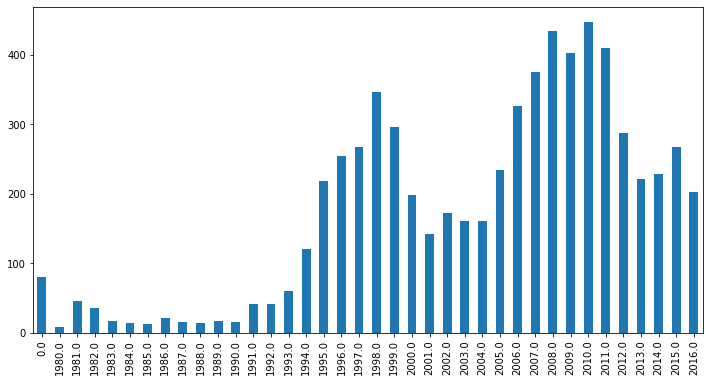

In [15]:
data[data.critic_score.isna() & data.user_score.isna() & data.rating.isna()].year_of_release.value_counts().sort_index().plot(kind='bar', figsize=(12,6))
None

In [16]:
data[data.critic_score.isna() & data.user_score.isna() & data.rating.isna()].genre.value_counts()

Action          1151
Misc             856
Adventure        831
Sports           821
Role-Playing     718
Fighting         409
Racing           364
Strategy         331
Platform         319
Shooter          298
Simulation       288
Puzzle           233
Name: genre, dtype: int64

Никаких закономерностей установить не получается. Наиболее правильно будет заменить пропущенные значения нулями. Так как если заменять какими-нибудь расчетными, то, возможно, популярными станут игры, которые на самом делел популярными не были. 

Проверим статистически гипотезу о равенстве суммарных продаж выборок:
1. Выборка с пропущенными значениями столбцов "critic_score", "user_score", "rating" (sample_missing).
2. Выборка с заполненными значениями хотя бы одного из столбцов"critic_score", "user_score", "rating" (sample_full).

***Нулевая гипотеза:*** суммарные продажи выборок 1 и 2 равны (статистически)

***Альтернативная гипотеза:*** суммарные продажи выборок 1 и 2 статистически различаются

## Суммарные продажи во всех регионах

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [18]:
data['total_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

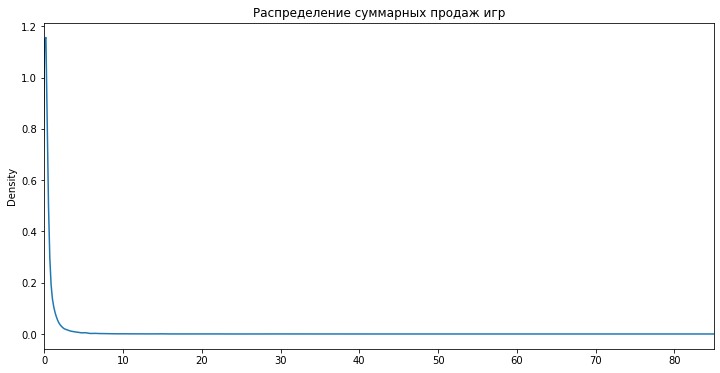

In [19]:
data[data['total_sales']>0]['total_sales'].plot(kind='kde', figsize=(12,6), xlim=(0,85), title='Распределение суммарных продаж игр')
None

In [20]:
sample_missing = data[data.critic_score.isna() & (data.user_score.isna() | (data.user_score=='tda')) & data.rating.isna()].total_sales
sample_full = data[~(data.critic_score.isna() & (data.user_score.isna() | (data.user_score=='tda')) & data.rating.isna())].total_sales
sample_missing.describe()

count    6619.000000
mean        0.426753
std         1.369457
min         0.000000
25%         0.040000
50%         0.110000
75%         0.340000
max        40.240000
Name: total_sales, dtype: float64

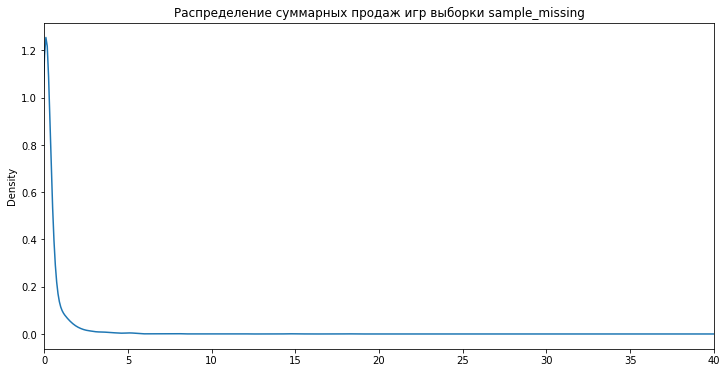

In [21]:
sample_missing.plot(kind='kde', figsize=(12,6), xlim=(0,40), title='Распределение суммарных продаж игр выборки sample_missing')
None

In [22]:
sample_full.describe()

count    10094.000000
mean         0.603191
std          1.651426
min          0.010000
25%          0.080000
50%          0.210000
75%          0.560000
max         82.540000
Name: total_sales, dtype: float64

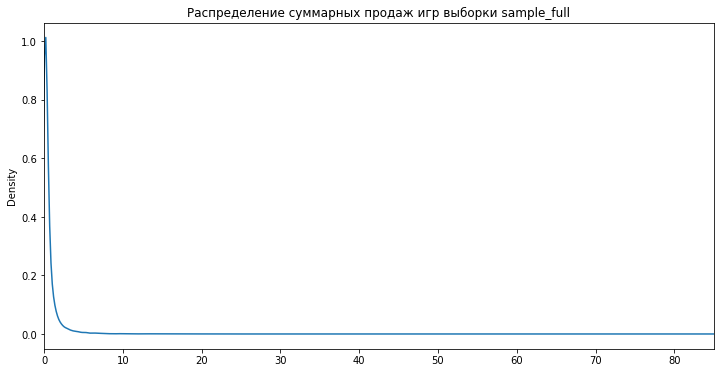

In [23]:
sample_full.plot(kind='kde', figsize=(12,6), xlim=(0,85), title='Распределение суммарных продаж игр выборки sample_full')
None

In [24]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_missing, 
    sample_full)

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.00000
Отвергаем нулевую гипотезу


***Вывод:*** Нулевая гипотеза утверждает равенство продаж выборок, альтернативная ей противоречит. Для проверки гипотезы использовалось p-value, то есть вероятность отклонить нулевую гипотезу, при которой на самом деле она верна (т.е. значения суммарных продаж выборок статистически равны). В результате нулевая гипотеза была отвергнута, то есть суммарные продажи выборок статистически равны с вероятностью меньшей принятого уровня значимости (1%) - то есть статистически различаются с вероятностью более 99%. Таким образом, будет некорректно заполнять пропущенные значения столбцов "critic_score", "user_score", "rating" путем расчета статистических характеристик по заполненным значениям (среднее, медиана, мода и т.п.), так как выборки статистически различаются и, следовательно, имеют разную структуру. Поэтому единственный возможный вариант заполнения пропущенных значений, заполнить их нулями.

## Преобразование типов данных

В столбце user_score необходимо привести тип данных к числовому, столбец year_of_release должен быть целочисленным. Пропущенные годы и оценки пользователей (в том числе "tbd" - скорее всего означает "to be determined", то есть не определена) заменим на 0, так как нельзя заменить эти значения расчетными величинами.

In [25]:
data.user_score.value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
9.6       2
0.9       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [26]:
data['user_score'] = data['user_score'].apply(lambda x: x if x!='tbd' else 0)
data.year_of_release.fillna(0, inplace=True)
data.user_score.fillna(0, inplace=True)
data.critic_score.fillna(0, inplace=True)
data.rating.fillna(0, inplace=True)
data = data.astype({'year_of_release':int, 'user_score':float})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


***Вывод:*** пропуски в столбцах name, year_of_release и genre могут быть вызваны человеческим фактором. Пропуски в столбцах critic_score, user_score и rating могут быть вызваны слишком маленькими продажами этой выборки игр: так как продажи игр в этой выборке (sample_missing) были слишком низкими, критики и пользователи уделяли слишком мало им внимания и не присвоили рейтинги. В выборке, где продажи игр были более высокими (sample_full) рейтинги играм присваивали. Было установлено, что выборки статистически различатся. Средние продажи в sample_full статистически значимо выше, чем в выборке sample_missing.

# Шаг 3. Исследовательский анализ данных

## Сколько игр выпускалось в разные годы

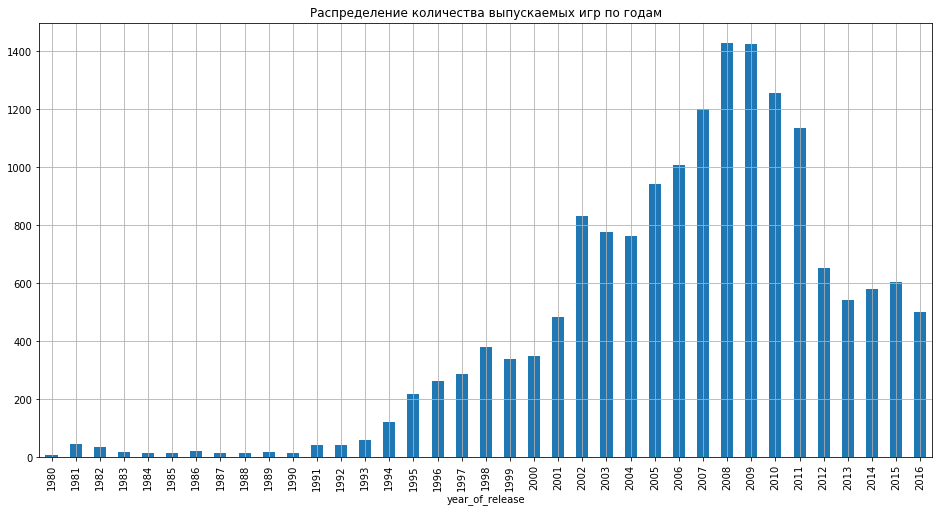

In [27]:
data[data.year_of_release>0].groupby('year_of_release')['name'].count().plot(kind='bar', 
                                                                             figsize=(16,8), 
                                                                             grid=True, 
                                                                             title='Распределение количества выпускаемых игр по годам')
None

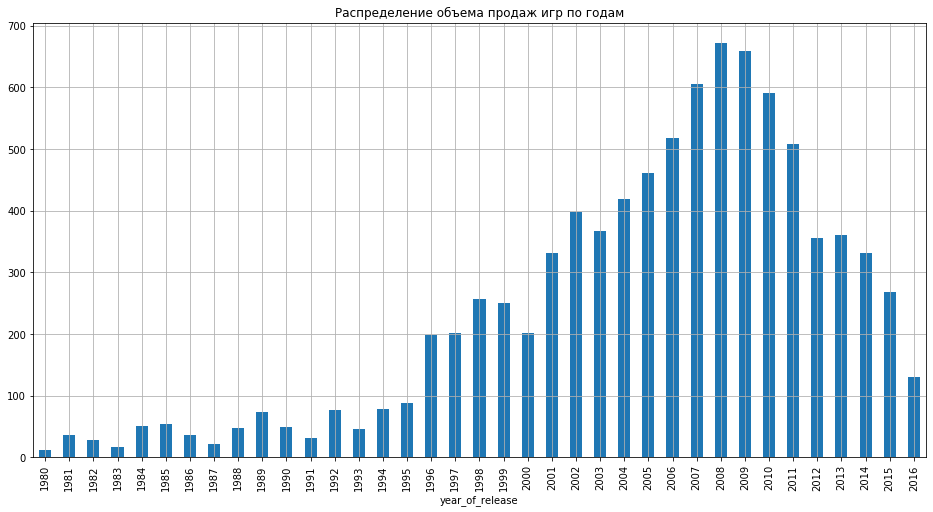

In [28]:
data[data.year_of_release>0].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', 
                                                                                  figsize=(16,8), 
                                                                                  grid=True, 
                                                                                  title='Распределение объема продаж игр по годам')
None

***Вывод:*** Пик количества выпускаемых игр и объемов их продаж пришлеся на 2008-2009 годы, после этого начался спад, который длится до времени прогноза. За время спада объем рынка сократился примерно в 5 раз.

##  Продажи по платформам

Как менялись продажи по платформам

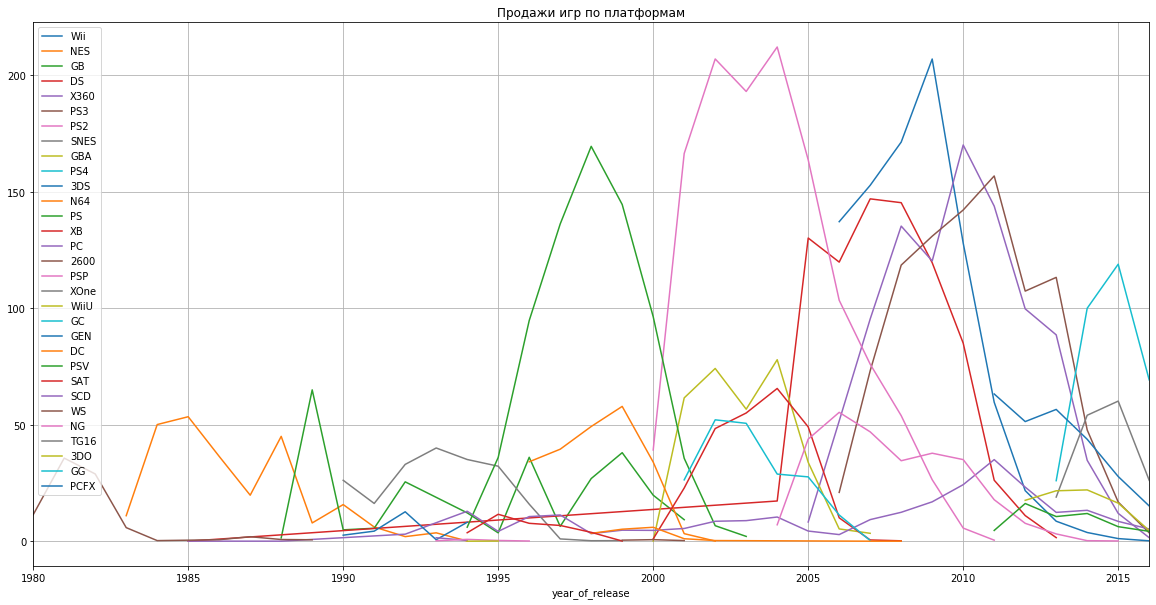

In [29]:
for platform in data.platform.unique():
    (
      data[(data.platform==platform)&(data.year_of_release>0)]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(figsize=(20,10), legend=True, grid=True, label=platform, title='Продажи игр по платформам')
    )

Найдем платформы с наибольшими суммарными продажами (топ-10)

In [30]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

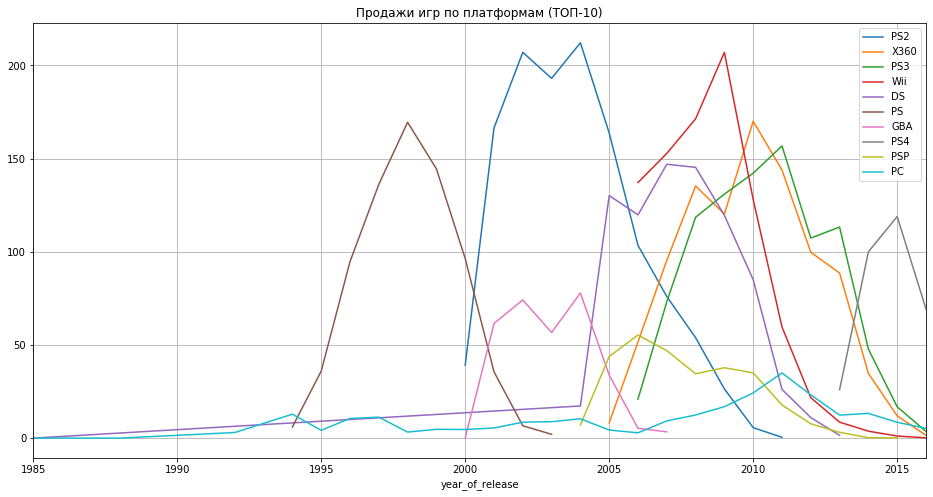

In [31]:
top_10_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index
for platform in top_10_platforms:
    (
      data[(data.platform==platform)&(data.year_of_release>0)]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(figsize=(16,8), legend=True, grid=True, label=platform, title='Продажи игр по платформам (ТОП-10)')
    )

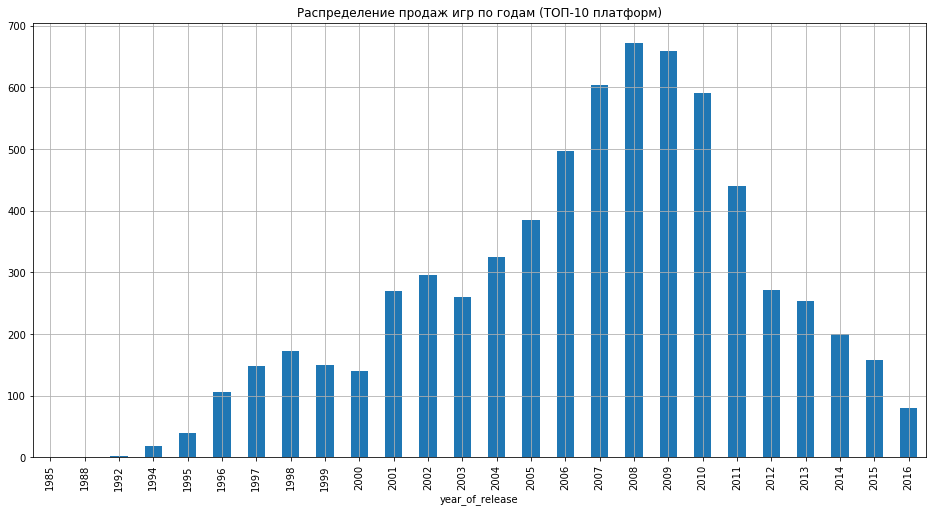

In [32]:
(
      data[(data.platform.isin(top_10_platforms))&(data.year_of_release>0)]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(kind='bar', figsize=(16,8), grid=True, title='Распределение продаж игр по годам (ТОП-10 платформ)')
    )
None

Распределение суммарных продаж топ-10 платформ повторяет распределение общего количества платформ. Пик также на 2008-2009 годах, после чего начинается спад.

За какой характерный срок появляются новые и исчезают старые платформы?

Посчитаем количество лет "жизни" каждой платформы и построим распределение.

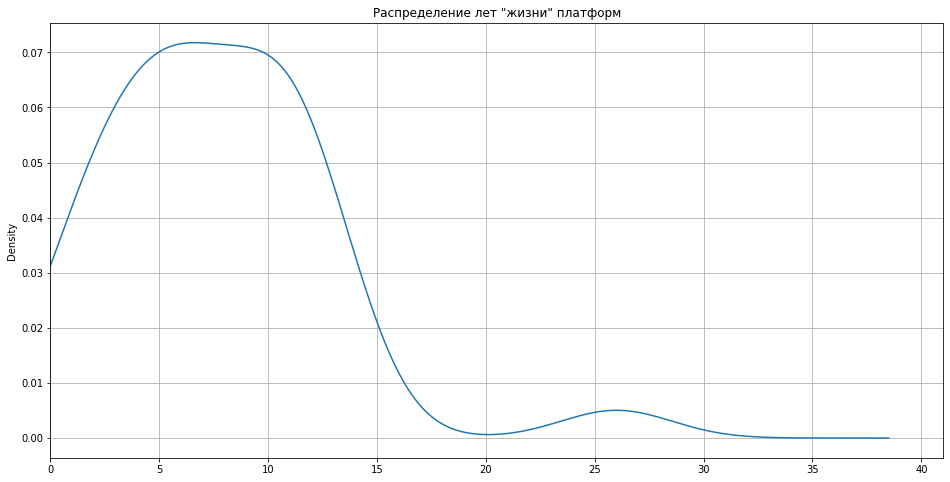

In [33]:
platform_life = {}
for platform in data.platform.unique():
    num_years = len(data[(data.platform==platform)&(data.year_of_release>0)]['year_of_release'].unique())
    platform_life[platform] = num_years
pd.Series(platform_life).plot(kind='kde', xlim=(0), figsize=(16,8), grid=True, title='Распределение лет "жизни" платформ')
None

***Вывод:*** Характерный срок выпуска игр для платформ: 5-10 лет. Однако факт выпусука игр может и не свидетельствовать об актуальности платформы. В такой динамично меняющейся индустрии, как компьютерные игры не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Поэтому актуальным периодом будем считать последние 3 года данных - с 2014 по 2016 год.

## Потенциально прибыльные платформы

Построим графики продаж игр за актуальный период

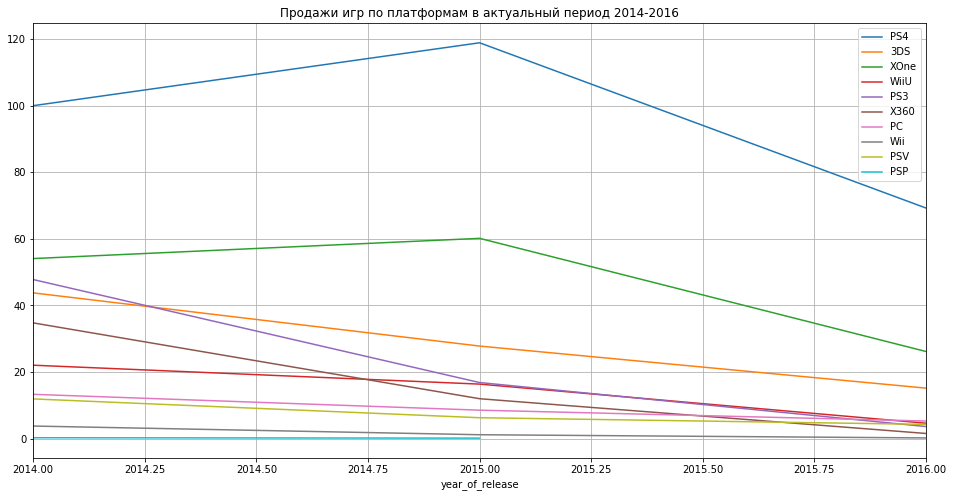

In [34]:
for platform in data[data.year_of_release>=2014].platform.unique():
    (
      data[(data.platform==platform)&(data.year_of_release>=2014)]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(figsize=(16,8), legend=True, grid=True, label=platform, title='Продажи игр по платформам в актуальный период 2014-2016')
    )

***Вывод:*** Продажи по всем платформам снижаются. Можно выделить 2 наиболее актуальные платформы: PS4, XOne (за 2015-2016 годы значительно превосходят по продажам другие платформы). Все платформы от лидеров рынка Sony и Microsoft соответственно. Несмотря на то, что продажи на рынке сокращаются, на лидеров можно ориентироваться.

## Boxplot по глобальным продажам игр в разбивке по платформам

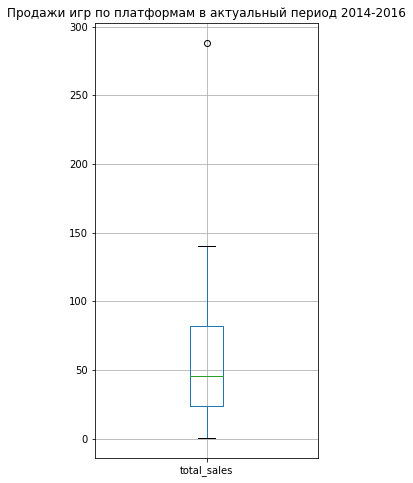

In [35]:
(
    data[(data.year_of_release>=2014)]
     .groupby('platform')['total_sales']
     .sum()
     .plot(kind='box', figsize=(4,8), legend=True, grid=True, title='Продажи игр по платформам в актуальный период 2014-2016')
)
None

In [36]:
print (
    data[(data.year_of_release>=2014)]
     .groupby('platform')['total_sales']
     .sum().sort_values(ascending=False)
)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


In [37]:
(
    data[(data.year_of_release>=2014)]
     .groupby('platform')['total_sales']
     .sum()
     .sort_values(ascending=False)
).describe()

count     10.000000
mean      72.945000
std       86.355404
min        0.360000
25%       23.562500
50%       45.600000
75%       82.055000
max      288.150000
Name: total_sales, dtype: float64

***Вывод:*** Среднее значение продаж по платформам за 2014-2016 - 72.95, медиана - 45.6. На боксплоте виден один выброс: продажи PS4. У этой платформы самые большие продажи за актуальный период, следом идет XOne. Именно эти платформы следует выбрать в качестве перспективных. У остальных платформ продажи занчительно ниже.

## Влияние отзывов на продажи

Оценим влияние отзывов критиков на продажи по платформе PS4

Коэффициент корреляции 0.40656790206178095


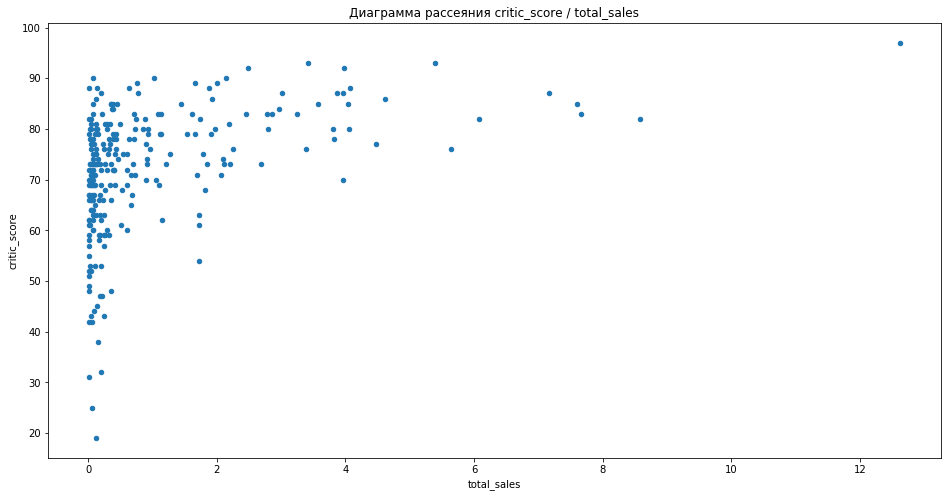

In [38]:
data[(data.platform=='PS4')&(data.critic_score>0)].plot(kind='scatter', 
                                                        x='total_sales', 
                                                        y='critic_score',
                                                        figsize=(16,8),
                                                       title='Диаграмма рассеяния critic_score / total_sales')
print('Коэффициент корреляции', data[(data.platform=='PS4')&(data.critic_score>0)]['critic_score'].corr(data[(data.platform=='PS4')&(data.critic_score>0)]['total_sales']))

Оценим влияние отзывов пользователей на продажи по платформе PS4

Коэффициент корреляции 0.351933109299014


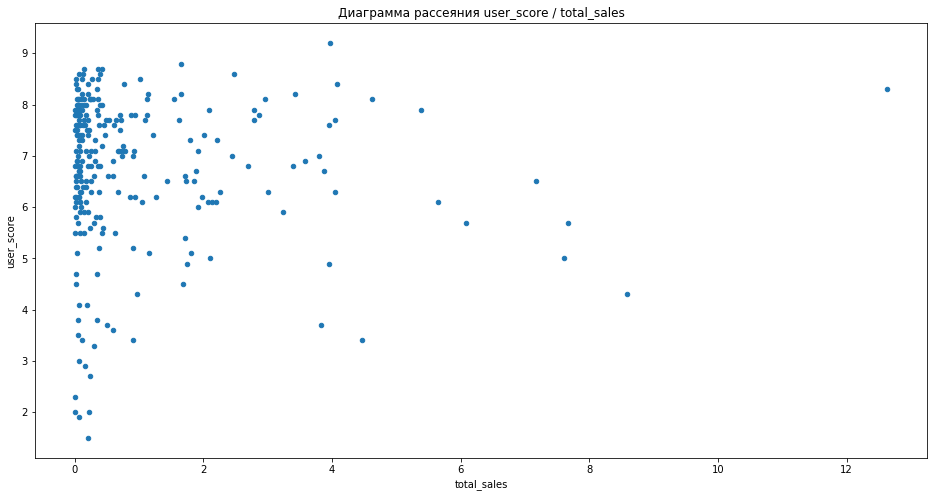

In [39]:
data[(data.platform=='PS4')&(data.user_score>0)].plot(kind='scatter', 
                                                      x='total_sales', 
                                                      y='user_score',
                                                      figsize=(16,8),
                                                      title='Диаграмма рассеяния user_score / total_sales')
print('Коэффициент корреляции', data[(data.platform=='PS4')&(data.user_score>0)]['critic_score'].corr(data[(data.platform=='PS4')&(data.user_score>0)]['total_sales']))

***Вывод:*** Зависимость между отзывами критиков и продажами слабая. Зависимость между отзывами пользователей и продажами еще меньше. Следовательно, ориентироваться на отзывы при определении перспективного продукта не следует.

## Распределение игр по жанрам

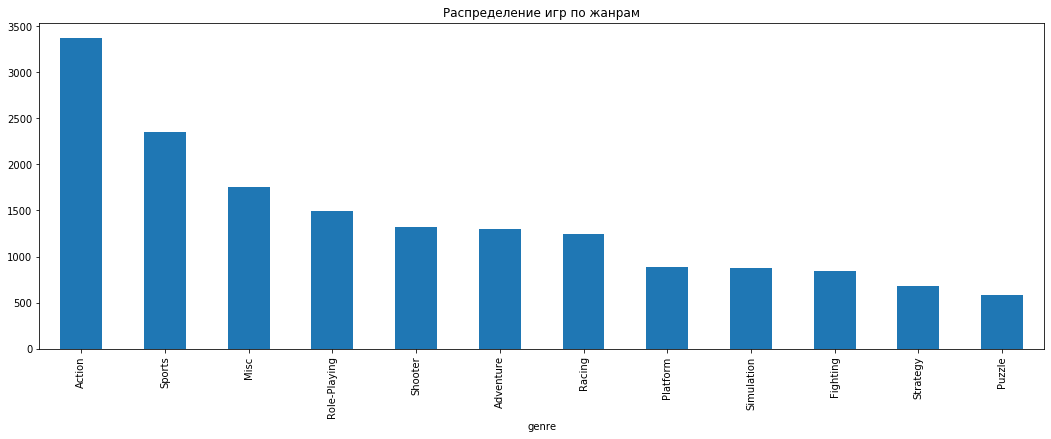

In [40]:
data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(18,6), title='Распределение игр по жанрам')
None 

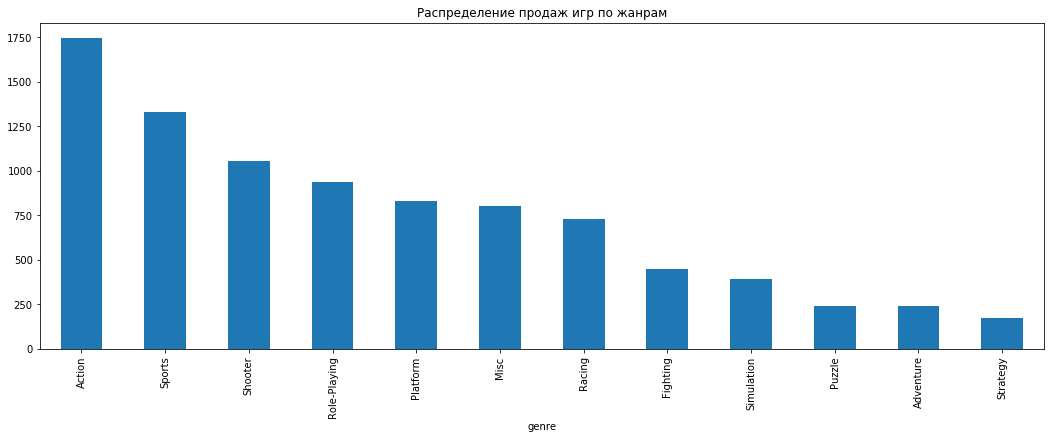

In [41]:
data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(18,6), title='Распределение продаж игр по жанрам')
None 

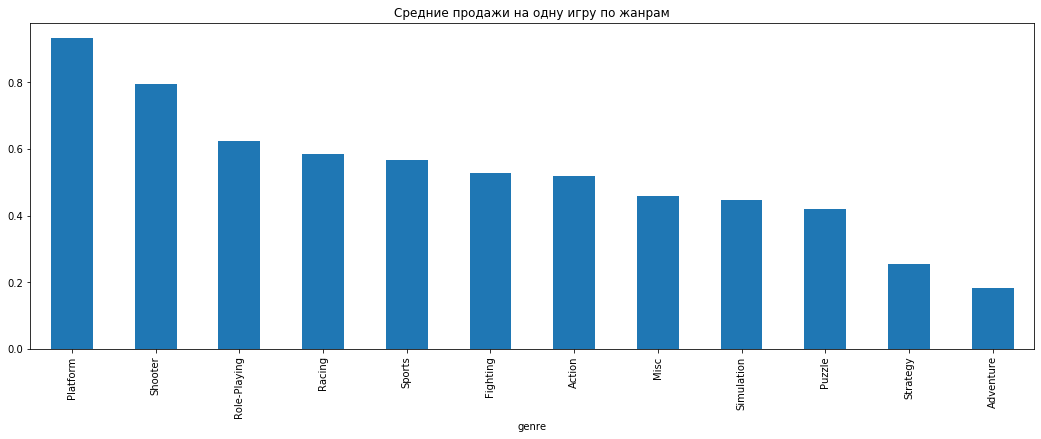

In [42]:
(data.groupby('genre')['total_sales'].sum() / data.groupby('genre')['name'].count()).sort_values(ascending=False).plot(kind='bar', figsize=(18,6), title='Средние продажи на одну игру по жанрам')
None 

***Вывод:*** самые перспективные жанры - с максимальными продажами на одну игру: Platform, Shooter, RPG.

# Шаг 4. Портреты пользователей каждого региона

## Самые популярные платформы (топ-5) по регионам (актуальный период)

Топ-5 популярных платформ по региону NA по объему продаж 2014-2016


,na_sales,share %
platform,,
PS4,98.61,38.996322
XOne,81.27,32.139044
X360,28.30,11.191521
3DS,22.64,8.953217
PS3,22.05,8.719896


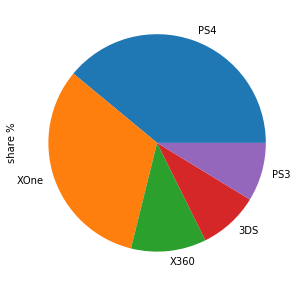



Топ-5 популярных платформ по региону EU по объему продаж 2014-2016


,eu_sales,share %
platform,,
PS4,130.04,55.120380
XOne,46.25,19.604103
PS3,25.54,10.825704
PC,17.97,7.616989
3DS,16.12,6.832825


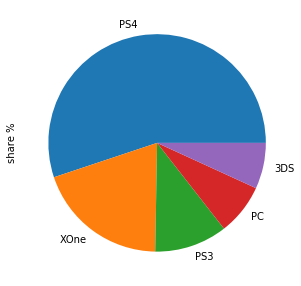



Топ-5 популярных платформ по региону JP по объему продаж 2014-2016


,jp_sales,share %
platform,,
3DS,44.24,47.915087
PS4,15.02,16.267735
PSV,14.54,15.747861
PS3,11.22,12.152063
WiiU,7.31,7.917253


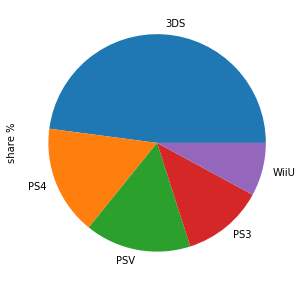



Топ-5 популярных платформ по региону OTHER по объему продаж 2014-2016


,other_sales,share %
platform,,
PS4,44.48,59.784946
XOne,12.52,16.827957
PS3,9.37,12.594086
X360,4.35,5.846774
3DS,3.68,4.946237


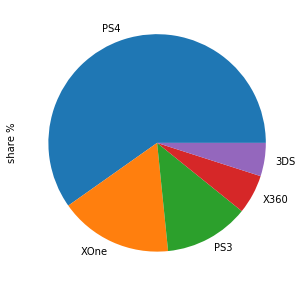

In [43]:
regions = ['na', 'eu', 'jp', 'other']
for region in regions:
    result = data[(data.year_of_release>=2014)].groupby('platform')[f'{region}_sales'].sum().sort_values(ascending=False).head()
    result = pd.DataFrame(result)
    result_sum = result[f'{region}_sales'].sum()
    result['share %'] = result[f'{region}_sales'] / result_sum * 100
    print(f'Топ-5 популярных платформ по региону {region.upper()} по объему продаж 2014-2016')
    display(result)
    result['share %'].plot(kind='pie', figsize=(5,5))
    plt.show()
    print()
    print('==================================')
    print()

***Вывод:*** Во всех регионах кроме JP самая популярная платформа PS4, следом идет XOne, у остальных платформ продажи значительно ниже. В регионе JP ситуация совершенно другая: на первом месте 3DS.

## Самые популярные жанры (топ-5) по регионам (актуальный период)

Топ-5 популярных жанров по региону NA по объему продаж 2014-2016


,na_sales,share %
genre,,
Shooter,79.02,32.095857
Action,72.53,29.459789
Sports,46.13,18.736799
Role-Playing,33.47,13.594639
Misc,15.05,6.112916


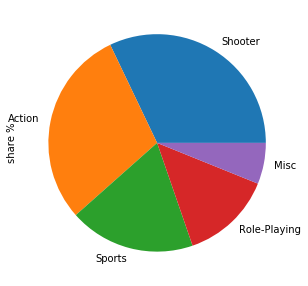



Топ-5 популярных жанров по региону EU по объему продаж 2014-2016


,eu_sales,share %
genre,,
Action,74.68,32.721378
Shooter,65.52,28.707882
Sports,45.73,20.036805
Role-Playing,28.17,12.342812
Racing,14.13,6.191123


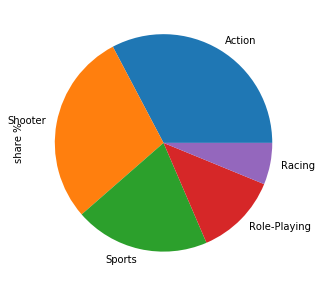



Топ-5 популярных жанров по региону JP по объему продаж 2014-2016


,jp_sales,share %
genre,,
Role-Playing,31.16,40.159814
Action,29.58,38.123470
Fighting,6.37,8.209821
Misc,5.61,7.230313
Shooter,4.87,6.276582


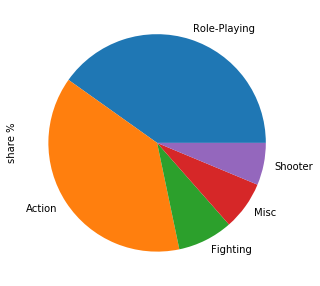



Топ-5 популярных жанров по региону OTHER по объему продаж 2014-2016


,other_sales,share %
genre,,
Action,22.57,31.730634
Shooter,21.53,30.268522
Sports,14.36,20.188387
Role-Playing,8.64,12.146774
Misc,4.03,5.665683


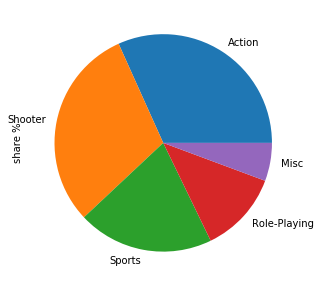

In [44]:
for region in regions:
    result = data[(data.year_of_release>=2014)].groupby('genre')[f'{region}_sales'].sum().sort_values(ascending=False).head()
    result = pd.DataFrame(result)
    result_sum = result[f'{region}_sales'].sum()
    result['share %'] = result[f'{region}_sales'] / result_sum * 100
    print(f'Топ-5 популярных жанров по региону {region.upper()} по объему продаж 2014-2016')
    display(result)
    result['share %'].plot(kind='pie', figsize=(5,5))
    plt.show()
    print()
    print('==================================')
    print()

***Вывод:*** Во всех регионах кроме JP самые популярные жанры Action и Shooter (1-2 место, доли очень близки), Sports - на 3 месте. В JP, как всегда, все очень не обычно: Role-Playing (1 место) и Action (2 место) лидируют с очень большим отрывом, по остальным жанрам продажи значительно ниже. 

## Влияние рейтинга ESRB на продажи в регионах

Самые популярные рейтинги игр по региону NA по средним продажам 2014-2016


,na_sales
rating,
M,0.363849
E,0.231689
E10+,0.179622
T,0.143727


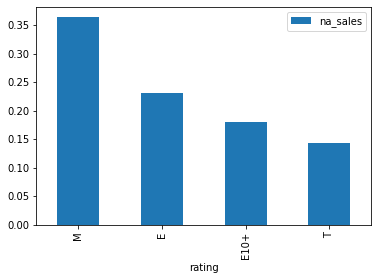



Самые популярные рейтинги игр по региону EU по средним продажам 2014-2016


,eu_sales
rating,
M,0.352604
E,0.265114
E10+,0.141405
T,0.125720


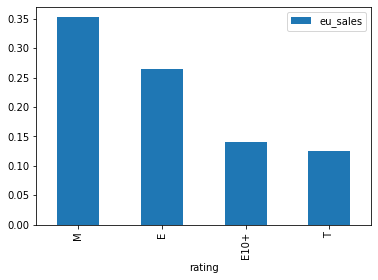



Самые популярные рейтинги игр по региону JP по средним продажам 2014-2016


,jp_sales
rating,
T,0.054539
E,0.040822
M,0.030226
E10+,0.024108


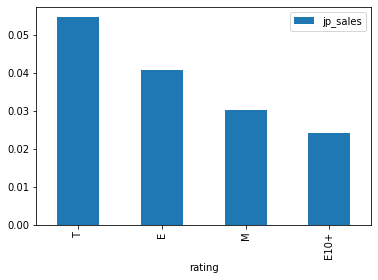



Самые популярные рейтинги игр по региону OTHER по средним продажам 2014-2016


,other_sales
rating,
M,0.108189
E,0.070274
E10+,0.042324
T,0.041808


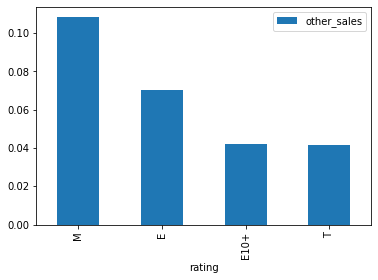

In [45]:
for region in regions:
    result = data[(data.year_of_release>=2014)&(data.rating!=0)].groupby('rating')[f'{region}_sales'].mean().sort_values(ascending=False)
    result = pd.DataFrame(result)
    print(f'Самые популярные рейтинги игр по региону {region.upper()} по средним продажам 2014-2016')
    display(result)
    result.plot(kind='bar')
    plt.show()
    print()
    print('================')
    print()

***Вывод:*** Во всех регионах кроме JP самые популярные рейтинги M (1 место) и E (2 место), по остальным рейтингам продажи значительно ниже. В JP, как всегда, все не обычно: на 1 месте T, на 2 - E, M только на 3 месте. 

# Шаг 5. Проверка гипотез

## Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

1. Выборка с рейтингами пользователей платформы XOne.
2. Выборка с рейтингами пользователей платформы PC.

***Нулевая гипотеза:*** средние рейтинги выборок 1 и 2 равны (статистически)

***Альтернативная гипотеза:*** средние рейтинги выборок 1 и 2 статистически различаются

In [46]:
sample_1 = data[(data.platform=='PC')&(data.user_score>0)]['user_score']
sample_2 = data[(data.platform=='XOne')&(data.user_score>0)]['user_score']

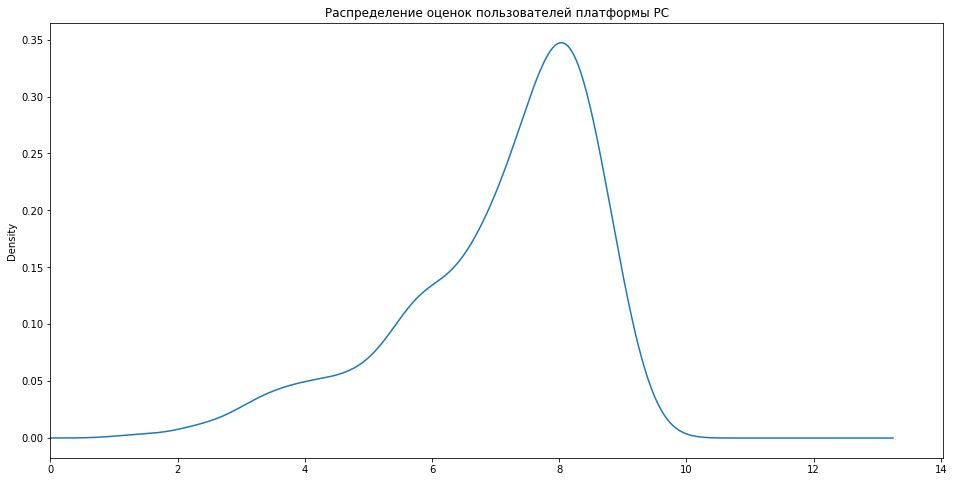

In [47]:
sample_1.plot(kind='kde', figsize=(16,8), xlim=(0), title='Распределение оценок пользователей платформы PC')
None

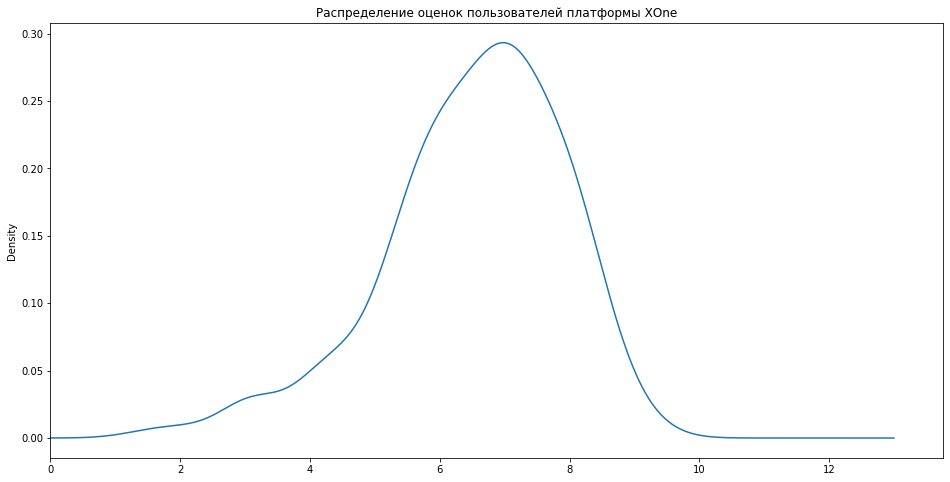

In [48]:
sample_2.plot(kind='kde', figsize=(16,8), xlim=(0), title='Распределение оценок пользователей платформы XOne')
None

In [49]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.00001
Отвергаем нулевую гипотезу


***Вывод:*** Нулевая гипотеза утверждает равенство пользовательских рейтингов выборок, альтернативная ей противоречит. Для проверки гипотезы использовалось p-value, то есть вероятность отклонить нулевую гипотезу, при которой на самом деле она верна (т.е. значения пользовательских рейтингов выборок статистически равны). В результате нулевая гипотеза была отвергнута, то есть пользовательские рейтинги выборок статистически равны с вероятностью меньшей принятого уровня значимости (1%) - то есть статистически различаются с вероятностью более 99%.

## Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

1. Выборка с рейтингами игроков жанра Action.
2. Выборка с рейтингами игроков жанра Sports.

***Нулевая гипотеза:*** средние рейтинги выборок 1 и 2 равны (статистически)

***Альтернативная гипотеза:*** средние рейтинги выборок 1 и 2 статистически различаются

In [50]:
sample_1 = data[(data.genre=='Action')&(data.user_score>0)]['user_score']
sample_2 = data[(data.genre=='Sports')&(data.user_score>0)]['user_score']

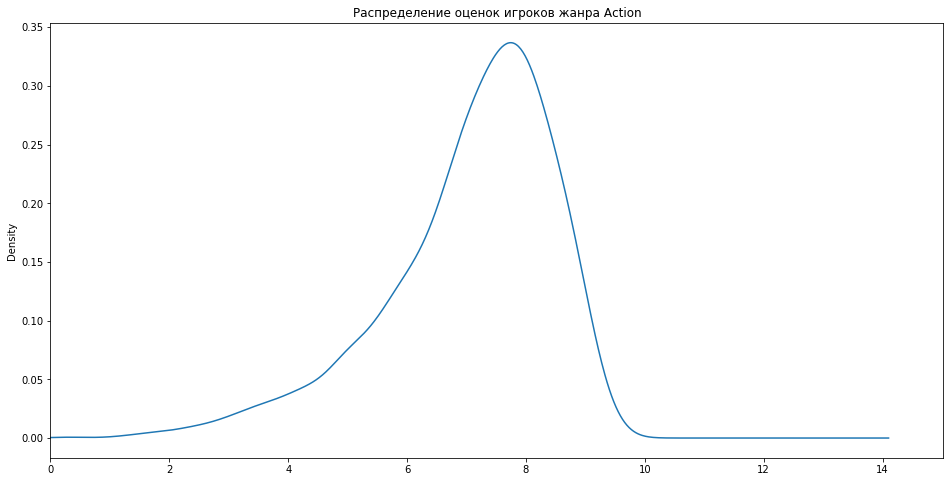

In [51]:
sample_1.plot(kind='kde', figsize=(16,8), xlim=(0), title='Распределение оценок игроков жанра Action')
None

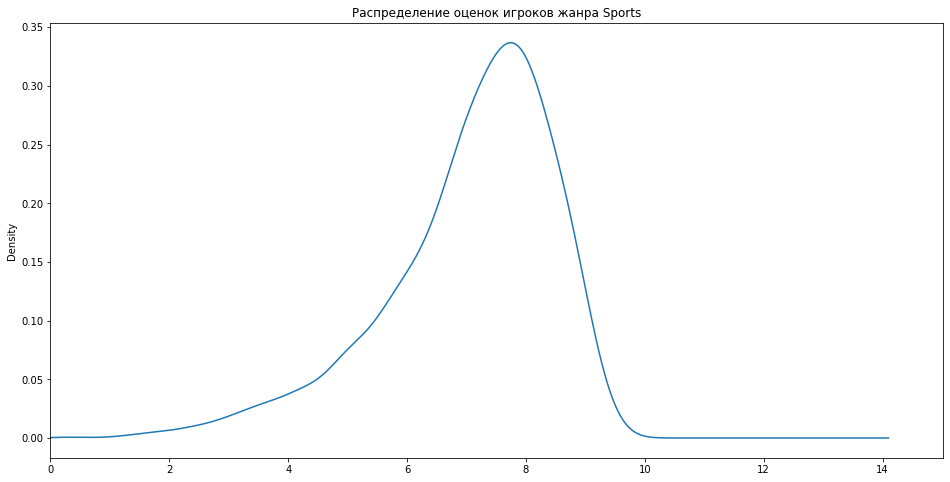

In [52]:
sample_1.plot(kind='kde', figsize=(16,8), xlim=(0), title='Распределение оценок игроков жанра Sports')
None

In [53]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10407
Не получилось отвергнуть нулевую гипотезу


***Вывод:*** Нулевая гипотеза утверждает равенство пользовательских рейтингов выборок, альтернативная ей противоречит. Для проверки гипотезы использовалось p-value, то есть вероятность отклонить нулевую гипотезу, при которой на самом деле она верна (т.е. значения пользовательских рейтингов выборок статистически равны). В результате нулевая гипотеза не была отвергнута, то есть пользовательские рейтинги игроков жанров Action и Sports статистически равны с вероятностью больше принятого уровня значимости (1%).

# Шаг 6. Общий вывод

По результатам исследования было установлено:
* Последние 5-6 лет на рынке наблюдается значительный спад продаж;
* Наиболее перспективные платформы за актуальный период: PS4, XOne;
* Самые высокие продажи у PS4;
* Ориентироваться на рейтинги пользователей и критиков при определении перспективного продукта не следует;
* Самые перспективные жанры Action и Shooter с рейтингом М;
* Ситуация в регионе JP коренным образом отличается от других регионов.


В 2017 году успешными должны быть следующие игры:
* Платформа: PS4, XOne (продажи по другим платформат за последние 2 года значительно ниже)
* Жанр: Action или Shooter
* Рейтинг: М